<a href="https://colab.research.google.com/github/onedayzero/Project_2/blob/main/Project_2_Val_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Why a Pro Valorant eSports Team Wins**
- Clint Atterberry


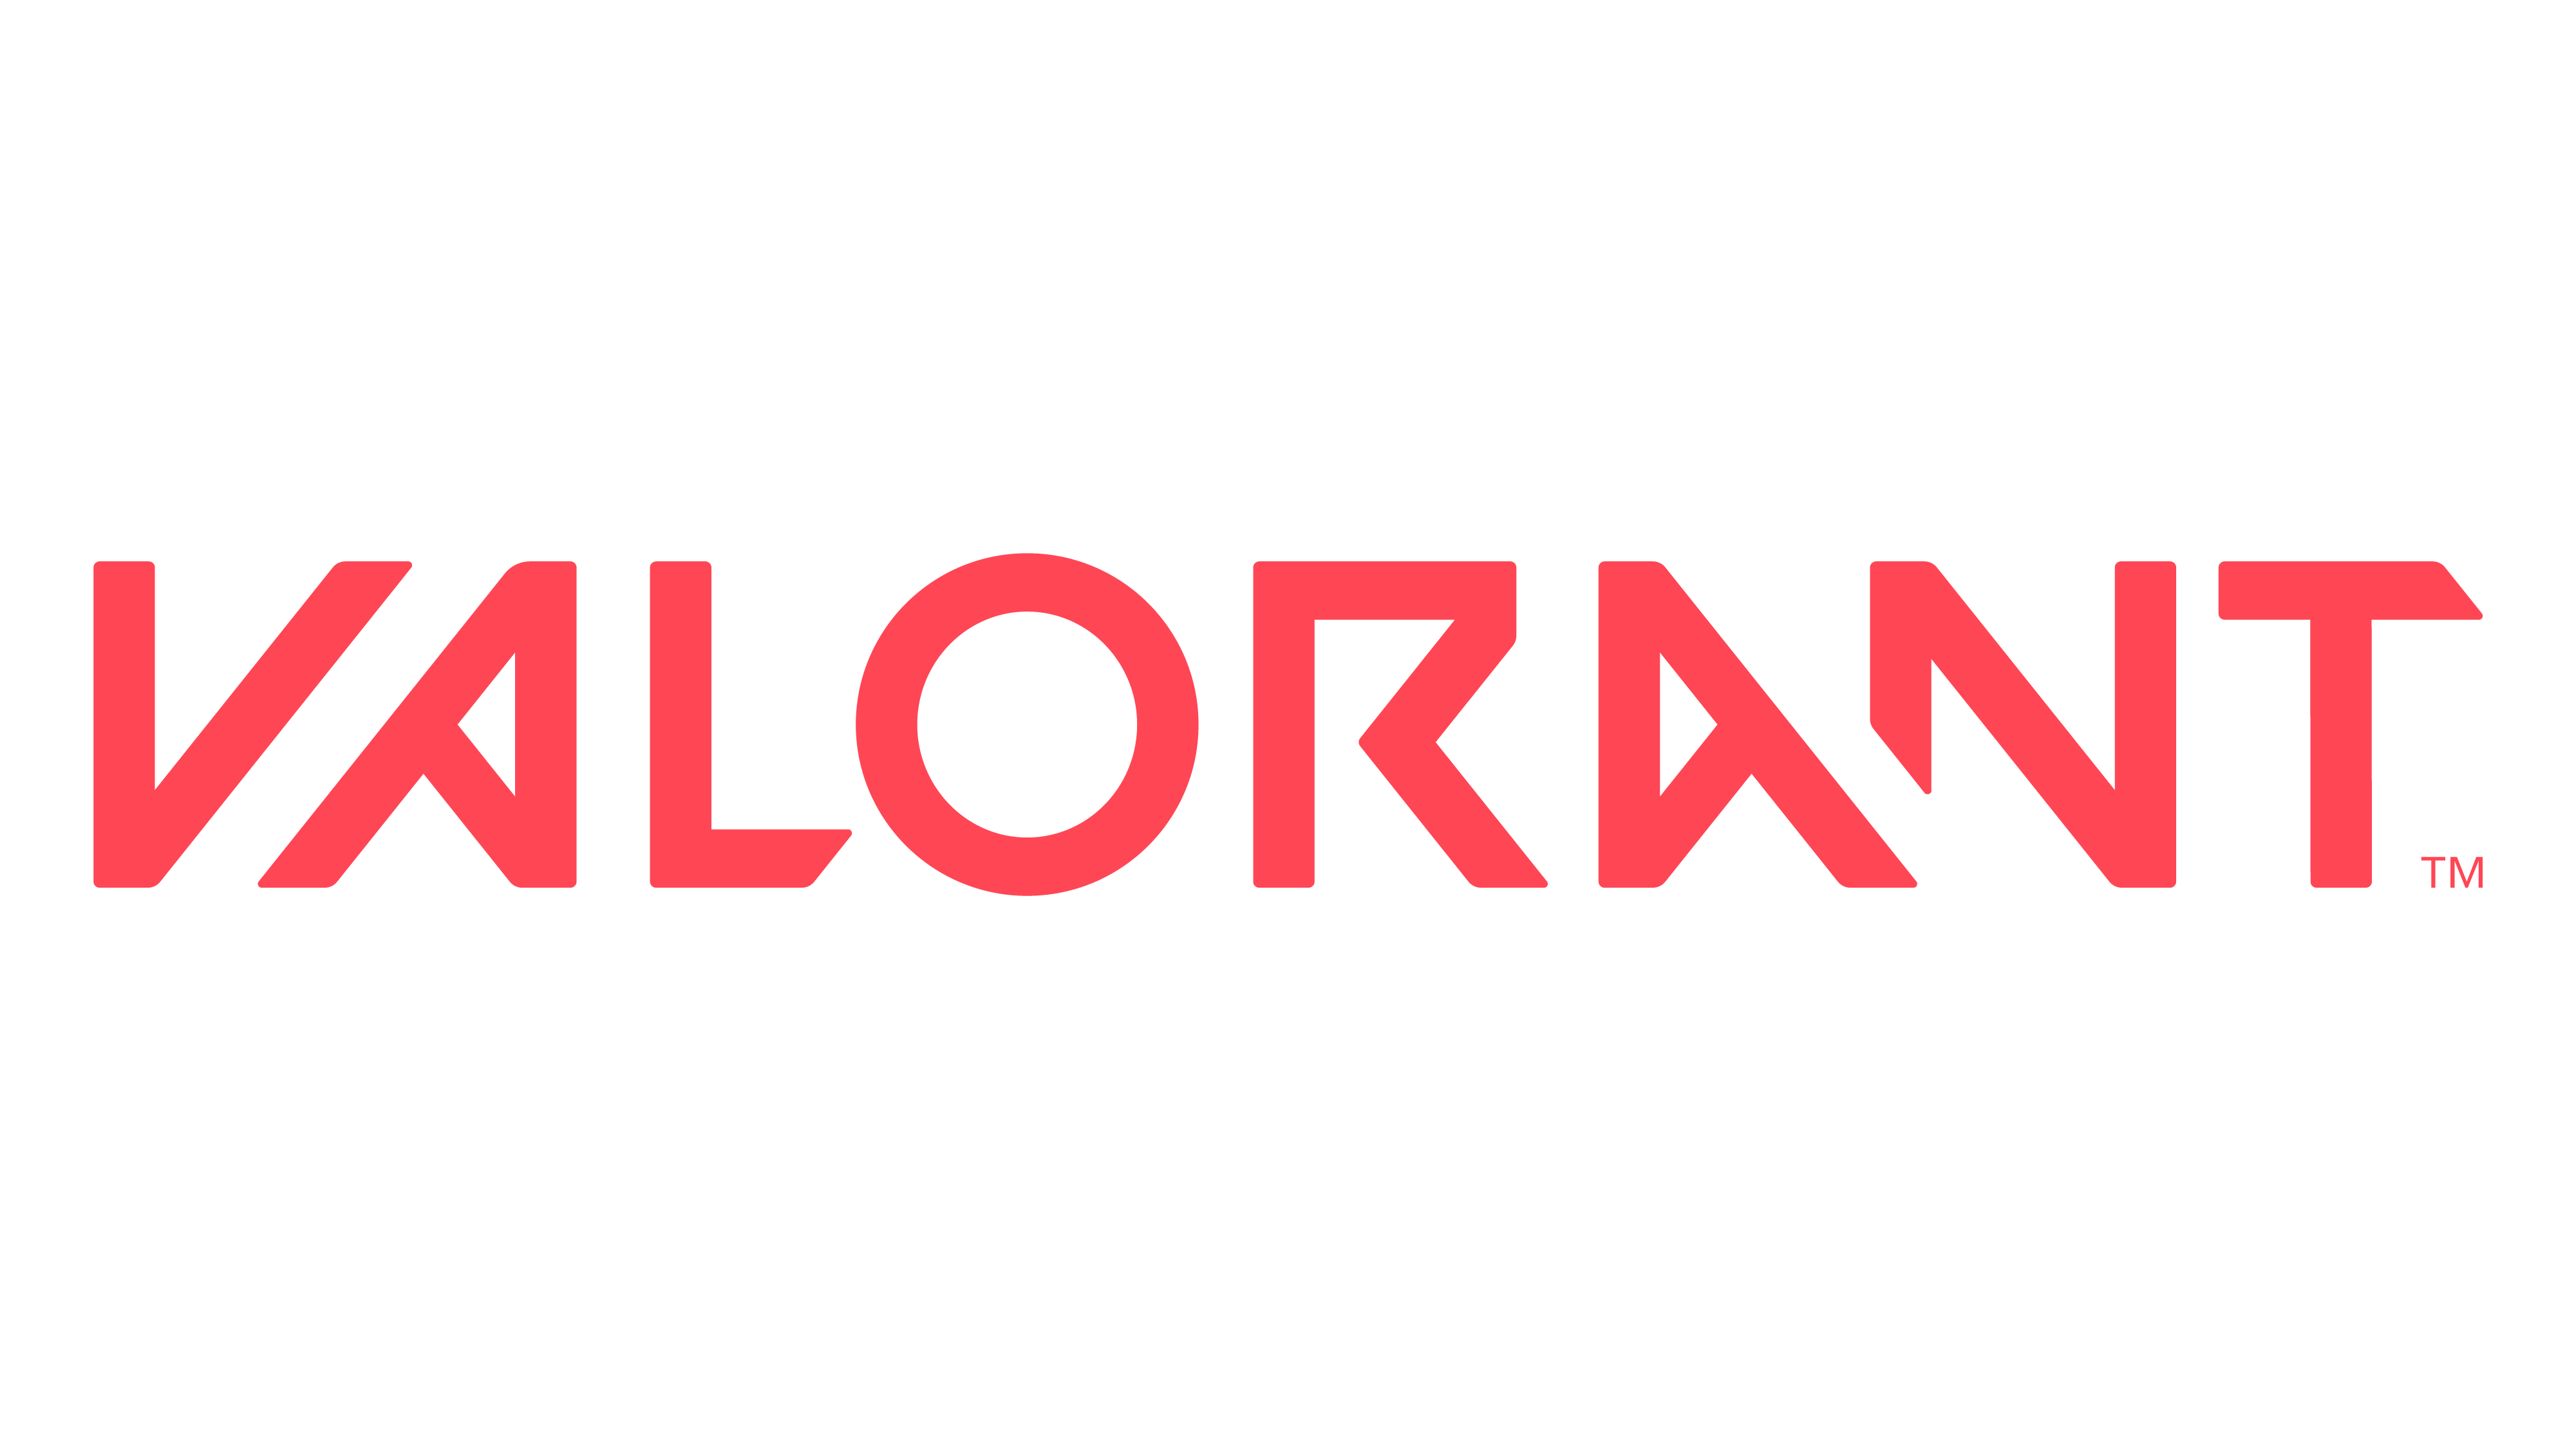

Image from the official Valorant Asset Kit [here](https://playvalorant.com/en-us/news/game-updates/valorant-asset-kit/).

The purpose of this project is to understand the ways a team wins in the game Valorant. Data was collected from over 10,0000 professional matches. I will be focusing on the First Half of the game to understand the connections between the types of guns bought for the rounds, the maps, and which side the teams started on, attack or defend.

- Initial Project Start  (14 July 2022)
- Revisions and Correlations Explored (21 July 2022)

# Setup

## Import Libraries

We will import the libraries we need for this project as we need them.

In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='darkgrid')

## Load Data

The data was found from Kaggle [here](https://www.kaggle.com/datasets/visualize25/valorant-pro-matches-full-data). We will load it and view the first 5 rows.

In [106]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRgfbORLFSODzyC5OGp0BWGWJ8VD7Vcx9DkjxBdnSgzfjxJmqAXlk-iyb8e6io3dYkjUCWtZuteOIZY/pub?output=csv')
df.head()

,GameID,MatchID,Map,Team1ID,Team2ID,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,...,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,60894,62393,Breeze,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,7,...,8.0,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0
1,60895,62393,Bind,6903,6020,Booster Seat Gaming,Pho Real,Pho Real,2,13,...,1.0,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0
2,60896,62393,Haven,6903,6020,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,8,...,9.0,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0
3,60924,62403,Icebox,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,6,...,8.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0
4,60925,62403,Haven,7046,7047,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,9,...,11.0,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0


In [107]:
df.shape

(15888, 36)

There is a lot of data, 15,888 rows over 36 columns.

# Delete Unnecessary Columns

*Look at all of the column names.*

In [108]:
df.columns

Index(['GameID', 'MatchID', 'Map', 'Team1ID', 'Team2ID', 'Team1', 'Team2',
       'Winner', 'Team1_TotalRounds', 'Team2_TotalRounds',
       'Team1_SideFirstHalf', 'Team2_SideFirstHalf', 'Team1_RoundsFirstHalf',
       'Team1_RoundsSecondtHalf', 'Team1_RoundsOT', 'Team2_RoundsFirstHalf',
       'Team2_RoundsSecondtHalf', 'Team2_RoundsOT', 'Team1_PistolWon',
       'Team1_Eco', 'Team1_EcoWon', 'Team1_SemiEco', 'Team1_SemiEcoWon',
       'Team1_SemiBuy', 'Team1_SemiBuyWon', 'Team1_FullBuy',
       'Team1_FullBuyWon', 'Team2_PistolWon', 'Team2_Eco', 'Team2_EcoWon',
       'Team2_SemiEco', 'Team2_SemiEcoWon', 'Team2_SemiBuy',
       'Team2_SemiBuyWon', 'Team2_FullBuy', 'Team2_FullBuyWon'],
      dtype='object')

In [109]:
df = df.drop(columns=['GameID',                 # Identifer Variable, not needed
                      'MatchID',                # Identifer Variable, not needed
                      'Team1ID',                # Identifer Variable, not needed
                      'Team2ID',                # Identifer Variable, not needed
                      ])
df.head()

,Map,Team1,Team2,Winner,Team1_TotalRounds,Team2_TotalRounds,Team1_SideFirstHalf,Team2_SideFirstHalf,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,...,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
0,Breeze,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,7,defend,attack,7,6,...,8.0,0.0,4.0,0.0,2.0,0.0,4.0,1.0,10.0,6.0
1,Bind,Booster Seat Gaming,Pho Real,Pho Real,2,13,defend,attack,2,0,...,1.0,2.0,2.0,2.0,0.0,0.0,4.0,3.0,9.0,8.0
2,Haven,Booster Seat Gaming,Pho Real,Booster Seat Gaming,13,8,attack,defend,8,5,...,9.0,1.0,2.0,1.0,2.0,0.0,6.0,2.0,11.0,5.0
3,Icebox,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,6,defend,attack,7,6,...,8.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,12.0,5.0
4,Haven,Bjor's Kittens,Mugiwara,Bjor's Kittens,13,9,defend,attack,9,4,...,11.0,1.0,3.0,2.0,3.0,0.0,4.0,3.0,12.0,4.0


# Duplicated Data

*I will explore the dataframe looking for duplicated rows.*

In [110]:
print(f'There were {df.duplicated().sum()} duplicated rows')
df.drop_duplicates(inplace=True)
print(f'There are now {df.duplicated().sum()} duplicated rows')

There were 4 duplicated rows
There are now 0 duplicated rows


# Missing Data

*Looking for missing data per column.*

In [111]:
print(f'Columns with missing values:\n\n{df.isna().sum()}\n')
Val_df = df.dropna()
print(f'Columns with missing values:\n\n{df.isna().sum()}')

Columns with missing values:

Map                           0
Team1                         0
Team2                         0
Winner                        0
Team1_TotalRounds             0
Team2_TotalRounds             0
Team1_SideFirstHalf           0
Team2_SideFirstHalf           0
Team1_RoundsFirstHalf         0
Team1_RoundsSecondtHalf       0
Team1_RoundsOT                0
Team2_RoundsFirstHalf         0
Team2_RoundsSecondtHalf       0
Team2_RoundsOT                0
Team1_PistolWon            1034
Team1_Eco                  1034
Team1_EcoWon               1034
Team1_SemiEco              1034
Team1_SemiEcoWon           1034
Team1_SemiBuy              1034
Team1_SemiBuyWon           1034
Team1_FullBuy              1034
Team1_FullBuyWon           1034
Team2_PistolWon            1034
Team2_Eco                  1034
Team2_EcoWon               1034
Team2_SemiEco              1034
Team2_SemiEcoWon           1034
Team2_SemiBuy              1034
Team2_SemiBuyWon           1034
Team2_Full

# Inconsistencies in Data of Categorical Columns

https://stackoverflow.com/questions/67981550/how-to-filter-and-find-out-all-the-columns-of-a-certain-data-type-in-pandas-data used as reference to select object data

In [112]:
col = Val_df.select_dtypes('object').columns.to_list()

# create a For Loop to analyze value counts of object columns
for col in Val_df[col]:
    print(Val_df[col].value_counts())
    print('\n')

Ascent      3643
Haven       3205
Bind        3069
Split       2223
Icebox      1942
Breeze       661
Fracture     107
Name: Map, dtype: int64


Renegades       206
Sentinels       146
Soniqs          129
Envy            125
Paper Rex       123
               ... 
Arcana            1
LAGOS             1
IC9               1
Lycus Empire      1
GoodVibes         1
Name: Team1, Length: 1150, dtype: int64


Renegades            78
Luminosity           78
Team Basilisk        76
Enigma Gaming        72
Team SMG             68
                     ..
Weird Esports         1
Beyond Infinity       1
Equinox Day           1
Zeusaberz Esports     1
GRANIT GAMING         1
Name: Team2, Length: 1990, dtype: int64


Renegades      187
Sentinels      139
Soniqs         133
Complexity     118
Paper Rex      117
              ... 
Boca Boston      1
ALFA Esport      1
CANAVARLAR       1
Demon            1
GoodVibes        1
Name: Winner, Length: 1306, dtype: int64


defend    7547
attack    7303
Name:

## Number Summary of Numeric Columns

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
used as reference

In [126]:
num_df.iloc[:,:11].describe().round(2)

,Team1_TotalRounds,Team2_TotalRounds,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,Team1_PistolWon,Team1_Eco,Team1_EcoWon
count,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00
mean,12.01,8.52,7.11,4.68,0.22,4.89,3.49,0.15,1.15,2.83,1.24
std,2.67,3.95,2.39,2.15,0.85,2.39,2.48,0.67,0.70,0.80,0.73
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,13.00,5.00,5.00,3.00,0.00,3.00,1.00,0.00,1.00,2.00,1.00
50%,13.00,9.00,7.00,5.00,0.00,5.00,3.00,0.00,1.00,3.00,1.00
75%,13.00,13.00,9.00,6.00,0.00,7.00,5.00,0.00,2.00,3.00,2.00
max,22.00,21.00,12.00,12.00,10.00,12.00,11.00,9.00,2.00,22.00,11.00


In [127]:
num_df.iloc[:,11:].describe().round(2)

,Team1_SemiEco,Team1_SemiEcoWon,Team1_SemiBuy,Team1_SemiBuyWon,Team1_FullBuy,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
count,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00,14850.00
mean,1.17,0.27,4.13,2.53,12.42,7.97,0.85,3.10,0.92,1.83,0.26,4.59,2.03,11.02,5.31
std,1.08,0.51,1.92,1.36,3.29,2.66,0.70,0.82,0.74,1.12,0.50,2.07,1.42,4.02,3.26
min,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,3.00,2.00,10.00,7.00,0.00,3.00,0.00,1.00,0.00,3.00,1.00,8.00,3.00
50%,1.00,0.00,4.00,2.00,12.00,8.00,1.00,3.00,1.00,2.00,0.00,4.00,2.00,11.00,5.00
75%,2.00,0.00,5.00,3.00,14.00,10.00,1.00,4.00,1.00,3.00,0.00,6.00,3.00,14.00,8.00
max,6.00,4.00,15.00,9.00,35.00,19.00,2.00,22.00,11.00,6.00,3.00,14.00,8.00,35.00,18.00


# Univariate Visualizations of the Data

*I will create a countplot for the distribution of maps that were selected throughout the data.*

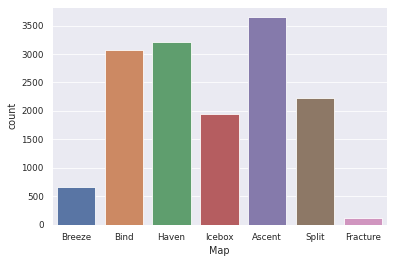

In [113]:
sns.countplot(x=Val_df['Map']);

This graphic shows me that the newer maps, Icebox, Breeze, and Fracture are the least selected maps by teams. The most selected is Ascent, the least is Split. I do not have the info on which maps the teams banned so that cannot be compared at this time.

## Boxplots

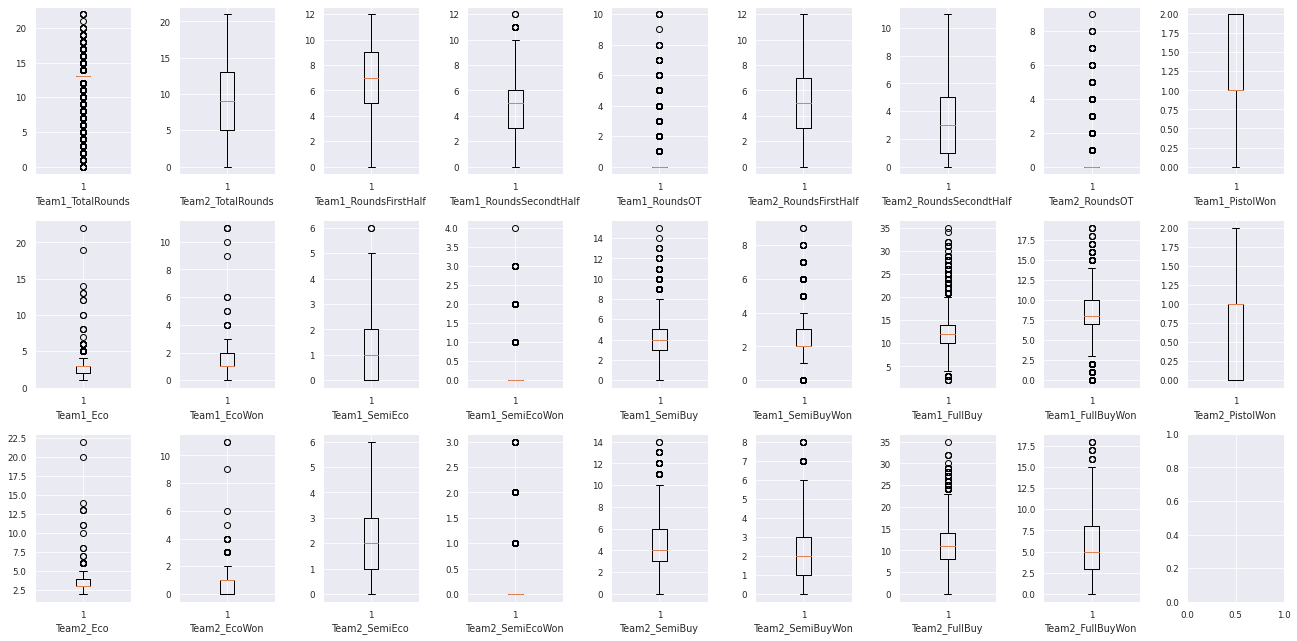

In [135]:
num_df = Val_df.select_dtypes(exclude='object')     # Creating a dataframe of
                                                    # just numeric data
fig, axes = plt.subplots(3,9, figsize = (18,9))
axes = axes.ravel()
for i, col in enumerate(num_df):
    axes[i].boxplot(num_df[col])
    axes[i].set_xlabel(f'{col}')
    
fig.tight_layout()

## Histograms

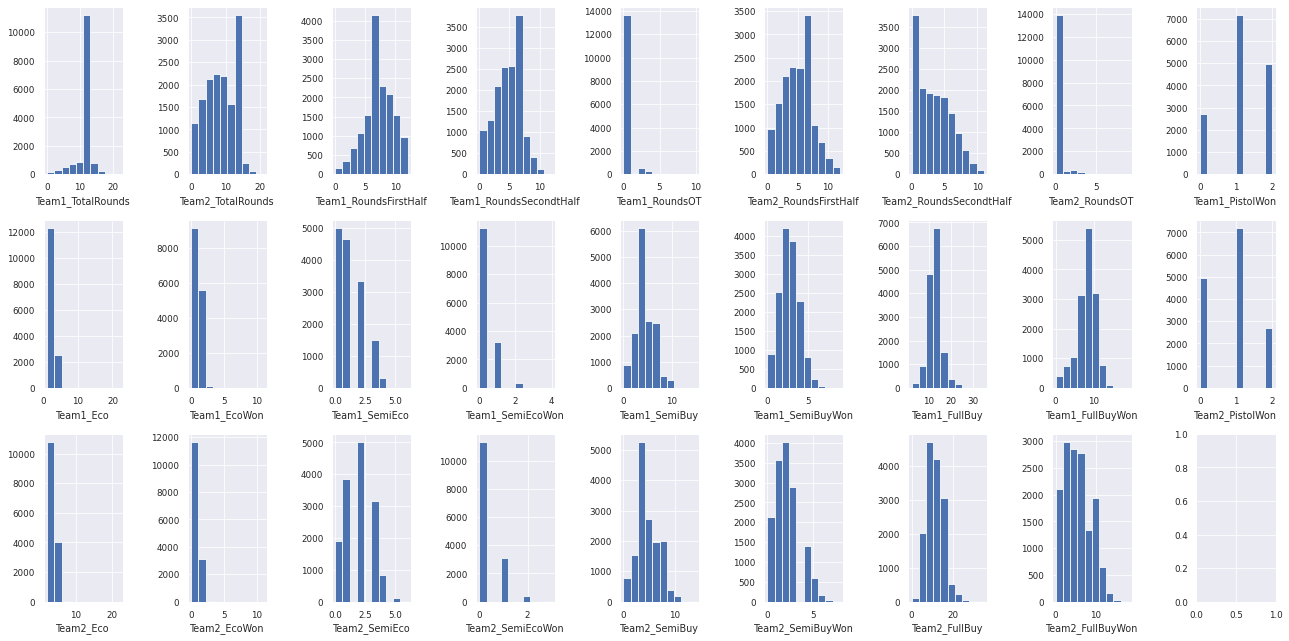

In [125]:
fig, axes = plt.subplots(3,9, figsize = (18,9))
axes = axes.ravel()
for k, col in enumerate(num_df):
    axes[k].hist(num_df[col])
    axes[k].set_xlabel(f'{col}')

fig.tight_layout()

## Analysis of Univariate Graphs

Some data appears to be fairly/roughly symmetrical while a lot of the the data is heavily skewed with outliers. The columns, in context of the data, that stick out to me are 'Team1_RoundsFirstHalf' and 'Team1_PistolWon'.

1. The first one sticks out particularly because 'Team1_RoundsFirstHalf' is counting how many rounds that Team1, the team that selected the map, won out of the 12. This data sticks out because the data ranges from 0 to 12, some teams didn't win any while some won all 12, neither of which are outliers, and the median is at 7 while the quartiles are at 5 and 9. **This tells me that the team that selects the map tends to win more rounds in the first half.**

2. The second one sticks out because it is measuring how many first round wins for each have the team has. During the first round for each half, the teams start with only enough money to purchase pistols and similar handguns. **The team that selects the map is heavily favored to win those rounds according to this data.**

# Correlations of the Features

In [128]:
num_df.corr().round(2)

,Team1_TotalRounds,Team2_TotalRounds,Team1_RoundsFirstHalf,Team1_RoundsSecondtHalf,Team1_RoundsOT,Team2_RoundsFirstHalf,Team2_RoundsSecondtHalf,Team2_RoundsOT,Team1_PistolWon,Team1_Eco,...,Team1_FullBuyWon,Team2_PistolWon,Team2_Eco,Team2_EcoWon,Team2_SemiEco,Team2_SemiEcoWon,Team2_SemiBuy,Team2_SemiBuyWon,Team2_FullBuy,Team2_FullBuyWon
Team1_TotalRounds,1.00,-0.40,0.54,0.50,0.34,-0.54,-0.19,0.24,0.30,-0.19,...,0.78,-0.30,0.23,-0.31,0.41,0.03,0.16,-0.21,0.03,-0.34
Team2_TotalRounds,-0.40,1.00,-0.74,0.18,0.36,0.74,0.78,0.37,-0.43,0.38,...,-0.22,0.43,-0.18,0.44,-0.32,0.11,0.03,0.49,0.82,0.88
Team1_RoundsFirstHalf,0.54,-0.74,1.00,-0.39,-0.12,-1.00,-0.19,-0.11,0.32,-0.25,...,0.41,-0.32,0.10,-0.34,0.33,-0.08,0.07,-0.31,-0.52,-0.67
Team1_RoundsSecondtHalf,0.50,0.18,-0.39,1.00,0.16,0.39,-0.13,0.14,0.05,0.01,...,0.38,-0.05,0.19,-0.03,0.13,0.11,0.10,0.04,0.39,0.19
Team1_RoundsOT,0.34,0.36,-0.12,0.16,1.00,0.12,0.26,0.71,-0.06,0.07,...,0.34,0.06,-0.03,0.06,-0.00,0.04,0.04,0.12,0.56,0.36
Team2_RoundsFirstHalf,-0.54,0.74,-1.00,0.39,0.12,1.00,0.19,0.11,-0.32,0.25,...,-0.41,0.32,-0.10,0.34,-0.33,0.08,-0.07,0.31,0.52,0.67
Team2_RoundsSecondtHalf,-0.19,0.78,-0.19,-0.13,0.26,0.19,1.00,0.22,-0.36,0.35,...,-0.03,0.36,-0.18,0.36,-0.18,0.10,0.11,0.45,0.67,0.65
Team2_RoundsOT,0.24,0.37,-0.11,0.14,0.71,0.11,0.22,1.00,-0.06,0.06,...,0.25,0.06,-0.03,0.06,-0.02,0.03,0.05,0.11,0.51,0.39
Team1_PistolWon,0.30,-0.43,0.32,0.05,-0.06,-0.32,-0.36,-0.06,1.00,-0.68,...,-0.14,-1.00,0.58,-0.91,0.09,0.03,-0.42,-0.47,-0.14,-0.11
Team1_Eco,-0.19,0.38,-0.25,0.01,0.07,0.25,0.35,0.06,-0.68,1.00,...,0.16,0.68,-0.29,0.72,-0.10,-0.01,0.30,0.39,0.18,0.13


### Features with Moderate to High Correlation
Using r values > 0.6

|Feature 1|Feature 2|Correlation|
|-|-|-|
|Team1_TotalRounds|Team1_FullBuyWon|0.78|
|Team2_RoundsFirstHalf|Team2_TotalRounds|0.74|
|Team1_RoundsFirstHalf|Team2_FullBuyWon|-0.67|
|Team1_PistolWon|Team1_EcoWon|0.89|
|Team1_FullBuy|Team1_FullBuyWon|0.71|
|Team2_PistolWon|Team1_Eco|0.68|
|Team2_PistolWon|Team1_EcoWon|-0.89|
|Team2_PistolWon|Team2_EcoWon|0.91|
|Team2_FullBuy|Team2_FullBuyWon|0.87|

# Creating multivariate exploratory visuals to further understand your data


https://seaborn.pydata.org/generated/seaborn.barplot.html used as reference

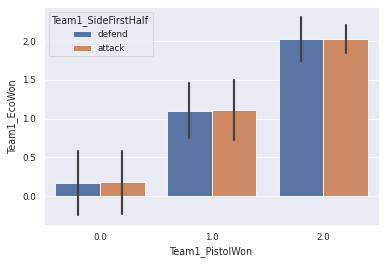

In [141]:
sns.barplot(
    data=Val_df,
    x='Team1_PistolWon',
    y='Team1_EcoWon',
    hue='Team1_SideFirstHalf',
    ci="sd"
    );

This graphs shows us that after Team1 wins the pistol round, they generally do well in the following eco round and it doesn't matter if they are Attack or Defend.

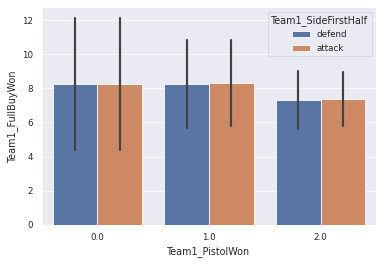

In [140]:
sns.barplot(
    data=Val_df,
    x='Team1_PistolWon',
    y='Team1_FullBuyWon',
    hue='Team1_SideFirstHalf',
    ci="sd"
    );

This graph is interesting because it shows that teams that win both halve's pistol rounds **do not appear to have an advantage** when they are playing in a full buy gun round.

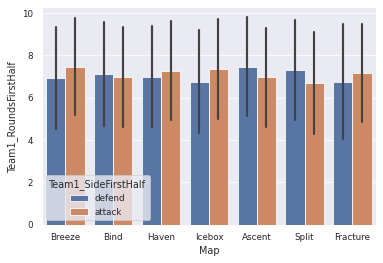

In [139]:
sns.barplot(
    data=Val_df,
    x='Map',
    y='Team1_RoundsFirstHalf',
    hue='Team1_SideFirstHalf',
    ci="sd"
    );

This graph shows that every map is slightly different with their mean rounds won in the first map on each map; however, the data is not that spread and Team1 generally wins morethan half of the rounds (the means are all greater than 6) across all maps whether they are attacking or not.

# Presentation Visuals

- https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn
- https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

as reference

**Countplot of Team1's First Half Rounds Won Depending on their Pistol Rounds**

---
The following visual shows how the team that selects the map, more often than not wins the first rounds of the half. We see this with the 2 bars being twice as tall as the 0 bars. There is not much of an obvious gap between if the team is attacking or defending.

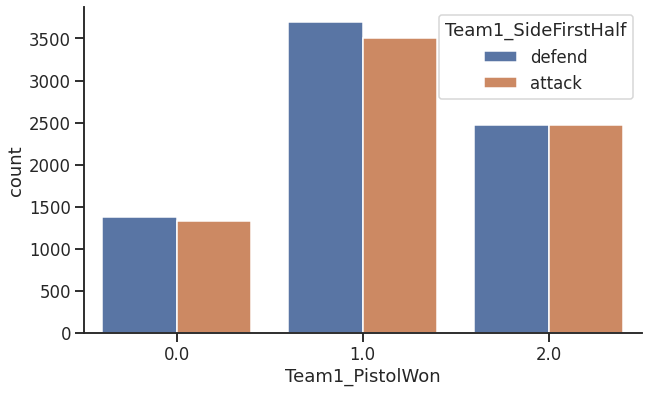

In [193]:
f, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='Team1_PistolWon', data=Val_df, hue='Team1_SideFirstHalf', );
sns.set_style('ticks')
sns.despine()
sns.set_context('talk')

**Heatmap of Team1's Results Based on Map**

---
The following visual shows how the new map, Fracture, has the most variance at the time that data was collected. Generally speaking, if the team that selects the map tends to win the pistol round (lots of 1's and 2's), which leads to winning a majority of the first half rounds (greater than 6 is more than half of the rounds), and this is true across all maps with the most variance on Fracture.

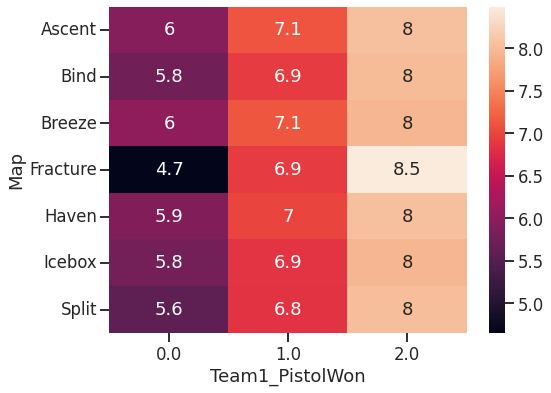

In [194]:
f, ax = plt.subplots(figsize=(8, 6))

pivot = Val_df.pivot_table(
    index=['Map'],
    columns=['Team1_PistolWon'],
    values='Team1_RoundsFirstHalf',
    aggfunc=np.average)
sns.heatmap(pivot,
            annot=True
            );

sns.set_context('talk')